In [2]:
from statsmodels.compat import lzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [23]:
df = pd.read_csv('Sales_Product_Price_by_Store.csv')
df.head()

,Store,Product,Date,Is_Holiday,Base Price,Price,Weekly_Units_Sold
0,1,1,2/5/2010,False,9.99,7.99,245
1,1,1,2/12/2010,True,9.99,7.99,453
2,1,1,2/19/2010,False,9.99,7.99,409
3,1,1,2/26/2010,False,9.99,7.99,191
4,1,1,3/5/2010,False,9.99,9.99,145


In [24]:
df.isnull().sum()

Store                0
Product              0
Date                 0
Is_Holiday           0
Base Price           0
Price                0
Weekly_Units_Sold    0
dtype: int64

### Regression Analysis
#### Ordinary Least Squares (OLS) Estimation

In [25]:
sales_model = ols("Weekly_Units_Sold     ~ Price", data=df).fit()
print(sales_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Weekly_Units_Sold   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     1018.
Date:                Mon, 23 Mar 2020   Prob (F-statistic):          2.09e-198
Time:                        16:21:02   Log-Likelihood:                -26127.
No. Observations:                3861   AIC:                         5.226e+04
Df Residuals:                    3859   BIC:                         5.227e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    428.4538      7.471     57.348      0.0

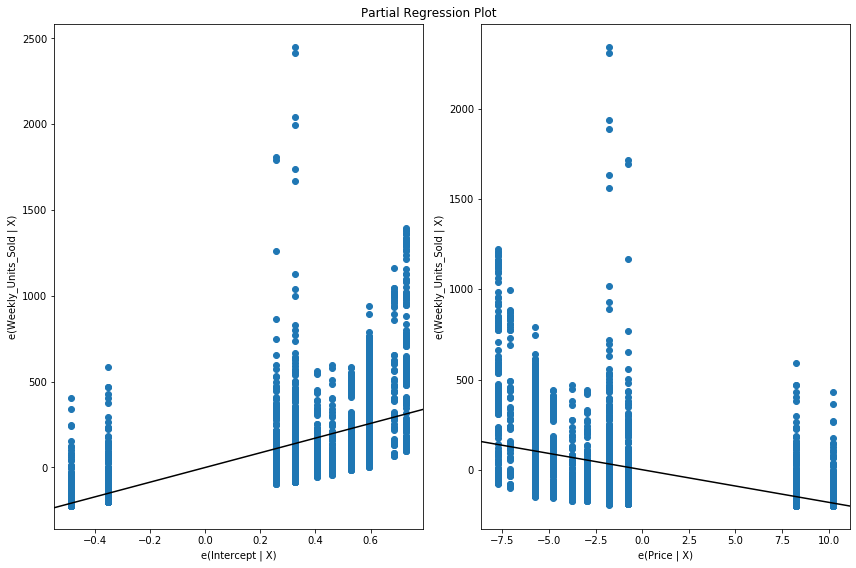

In [26]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(sales_model, fig=fig)

The trend indicates that the predictor variables (Price) provides information about the response (Quantity), and data points do not fall further from the regression line, and the predictions are very precise given a prediction interval that extends from about 29 to 31.

#### Component-Component plus Residual (CCPR) Plots¶
The CCPR plot provides a way to judge the effect of one regressor on the response variable by taking into account the effects of the other independent variables.

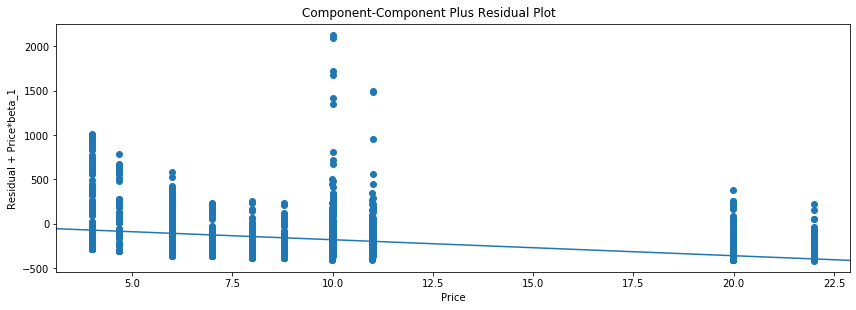

In [27]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_ccpr_grid(sales_model, fig=fig)

#### Regression plots
We use plot_regress_exog function to quickly check model assumptions with respect to a single regressor, Price in our case.

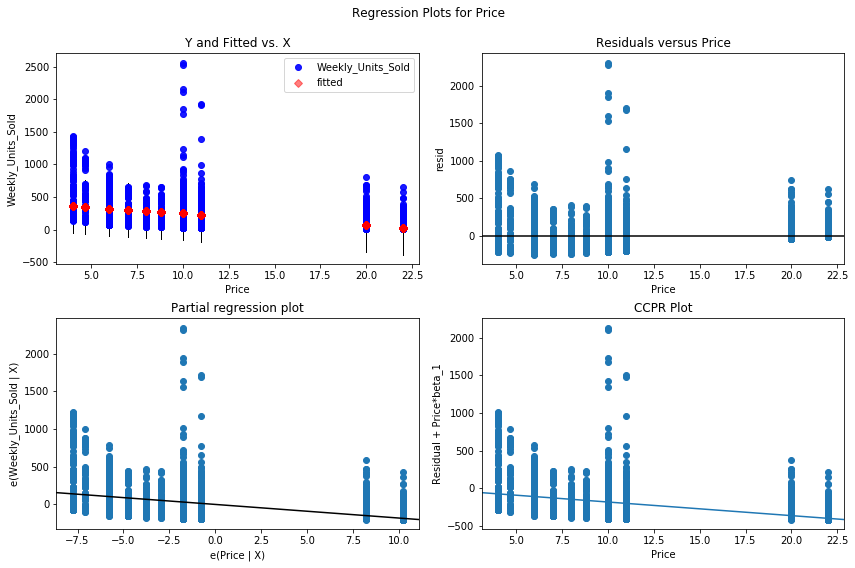

In [28]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(sales_model, 'Price', fig=fig)

#### Recursive Least Square (RLS)
Finally we apply Recursive Least Square (RLS) filter to investigate parameter instability.

In [29]:
df.columns

Index(['Store', 'Product', 'Date', 'Is_Holiday', 'Base Price', 'Price',
       'Weekly_Units_Sold'],
      dtype='object')

In [30]:
df['Date']

0         2/5/2010
1        2/12/2010
2        2/19/2010
3        2/26/2010
4         3/5/2010
           ...    
3856     9/28/2012
3857     10/5/2012
3858    10/12/2012
3859    10/19/2012
3860    10/26/2012
Name: Date, Length: 3861, dtype: object

In [31]:
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")
df.head()

,Store,Product,Date,Is_Holiday,Base Price,Price,Weekly_Units_Sold
0,1,1,2010-02-05,False,9.99,7.99,245
1,1,1,2010-02-12,True,9.99,7.99,453
2,1,1,2010-02-19,False,9.99,7.99,409
3,1,1,2010-02-26,False,9.99,7.99,191
4,1,1,2010-03-05,False,9.99,9.99,145


In [32]:
df.set_index('Date', inplace=True)
df.head()

,Store,Product,Is_Holiday,Base Price,Price,Weekly_Units_Sold
Date,,,,,,
2010-02-05,1,1,False,9.99,7.99,245
2010-02-12,1,1,True,9.99,7.99,453
2010-02-19,1,1,False,9.99,7.99,409
2010-02-26,1,1,False,9.99,7.99,191
2010-03-05,1,1,False,9.99,9.99,145


In [34]:
endog = df['Weekly_Units_Sold']

# To the regressors in the dataset, we add a column of ones for an intercept
exog = sm.add_constant(df['Price'])

C:\Users\TanushPasupuleti\Anaconda3\envs\tanush_data_science\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### RLS estimation

In [35]:
mod = sm.RecursiveLS(endog, exog)
res = mod.fit()

print(res.summary())

                           Statespace Model Results                           
Dep. Variable:      Weekly_Units_Sold   No. Observations:                 3861
Model:                    RecursiveLS   Log Likelihood              -26125.860
Date:                Mon, 23 Mar 2020   R-squared:                       0.209
Time:                        16:21:45   AIC                          52255.720
Sample:                             0   BIC                          52268.238
                               - 3861   HQIC                         52260.166
Covariance Type:            nonrobust   Scale                        44209.012
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        428.4538      7.473     57.334      0.000     413.807     443.101
Price        -18.0605      0.566    -31.893      0.000     -19.170     -16.951
Ljung-Box (Q):                    47321.74   Jarque-

C:\Users\TanushPasupuleti\Anaconda3\envs\tanush_data_science\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


#### RLS plots
We can generate the recursively estimated coefficients plot on a given variable.

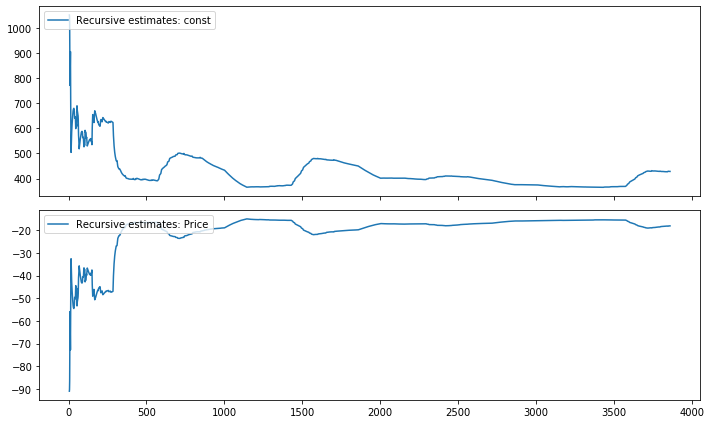

In [36]:
res.plot_recursive_coefficient(range(mod.k_exog), alpha=None, figsize=(10,6));

For convenience, we visually check for parameter stability using the plot_cusum function.

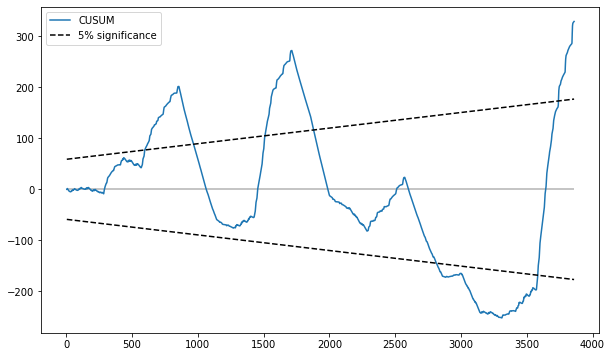

In [37]:
fig = res.plot_cusum(figsize=(10,6));